## Observations and Insights 

In [96]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_results_df = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_study_results_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [97]:
# Checking the number of mice.
#https://stackoverflow.com/questions/43066374/how-to-find-out-number-of-unique-values-in-a-column-along-with-count-of-the-uniq
total_number_mice = mouse_study_results_df["Mouse ID"].nunique()
total_number_mice

# Display the total number of mice
print(f"Total number of mice = {total_number_mice}")

Total number of mice = 249


In [98]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#https://www.geeksforgeeks.org/find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns/
duplicate_number_mice = mouse_study_results_df[mouse_study_results_df.duplicated(['Mouse ID', 'Timepoint'])]
mouse_ID = duplicate_number_mice["Mouse ID"].unique()

# Display the duplicate mouse ID
print(f"The duplicate mouse ID is {mouse_ID}")

The duplicate mouse ID is ['g989']


In [99]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_number_mice = mouse_study_results_df[mouse_study_results_df.duplicated(['Mouse ID', 'Timepoint'])]

# Display the data table
duplicate_number_mice


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [100]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_clean_results_df = mouse_study_results_df[(mouse_study_results_df["Mouse ID"] !="g989")]

# Display the data table
mouse_clean_results_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [101]:
# Checking the number of mice in the clean DataFrame.
total_mouse_clean_results_df = mouse_clean_results_df["Mouse ID"].nunique()
total_mouse_clean_results_df

# Display the number of mice in the clean data table
print(f"The number of mice in the clean DataFrame = {total_mouse_clean_results_df}")

The number of mice in the clean DataFrame = 248


## Summary Statistics

In [102]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

#Group by the Drug Regimen
by_drug_regimen_df = mouse_clean_results_df.groupby(['Drug Regimen'])  

#Calculate the mean of the tumor volume
mean_drug_regimen= by_drug_regimen_df['Tumor Volume (mm3)'].mean()
mean_drug_regimen

#Calculate the median of the tumor volume
median_drug_regimen= by_drug_regimen_df['Tumor Volume (mm3)'].median()
median_drug_regimen

#Calculate the variance of the tumor volume
var_drug_regimen= by_drug_regimen_df['Tumor Volume (mm3)'].var()
var_drug_regimen

#Calculate the standard deviation of the tumor volume
stdev_drug_regimen= by_drug_regimen_df['Tumor Volume (mm3)'].std()
stdev_drug_regimen

#Calculate the SEM of the tumor volume
SEM_drug_regimen= by_drug_regimen_df.sem()['Tumor Volume (mm3)']
SEM_drug_regimen

#Create the dataframe
Summary_DF = pd.DataFrame ({
    "Mean":mean_drug_regimen,
    "Median":median_drug_regimen,
    "Variance":var_drug_regimen,
    "Standard Deviation":stdev_drug_regimen,
    "SEM":SEM_drug_regimen})

# Display the data table
Summary_DF

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [103]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
#https://www.python-ds.com/python-data-aggregation#:~:text=Python%20has%20several%20methods%20are%20available%20to%20perform,one%20or%20more%20operations%20over%20the%20specified%20axis.
 
##Group by the Drug Regimen
by_drug_regimen_df2 = mouse_clean_results_df.groupby(['Drug Regimen'])

# Use the aggregation method, produce the same summary statistics in a single line
Summary_DF2=by_drug_regimen_df2.agg({'Tumor Volume (mm3)':['mean', 'median', 'var','std', 'sem' ]})

# Display the data table
Summary_DF2


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

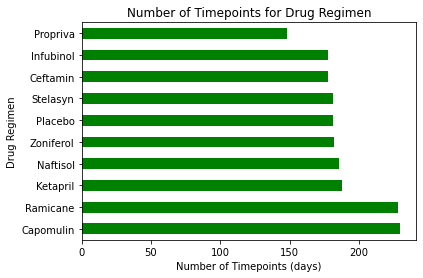

In [104]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

#Find the number of unique Drug Regimen in the dataset
drugs_reg=mouse_clean_results_df['Drug Regimen'].unique()
drugs_reg

#Count the number of timepoints (days) for each Drug Regimen
timepoints=mouse_clean_results_df['Drug Regimen'].value_counts()
timepoints

#Create a bar chart using Pandas DataFrame.plot()
timepoints.plot(kind='barh', title='Male vs. Female mice', color='green')
plt.title("Number of Timepoints for Drug Regimen")
plt.xlabel("Number of Timepoints (days)")
plt.ylabel("Drug Regimen")
plt.show()


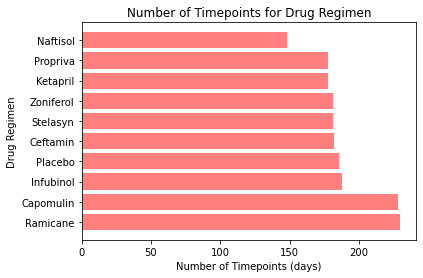

In [105]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

#Find the number of unique Drug Regimen in the dataset
drugs_reg=mouse_clean_results_df['Drug Regimen'].unique()
drugs_reg

#Count the number of timepoints (days) for each Drug Regimen
timepoints=mouse_clean_results_df['Drug Regimen'].value_counts()
timepoints

#Create a bar chart using Matplotlib's pyplot
plt.barh(drugs_reg, timepoints, color='r', alpha=.5, align="center")
plt.title("Number of Timepoints for Drug Regimen")
plt.xlabel("Number of Timepoints (days)")
plt.ylabel("Drug Regimen")
plt.show()

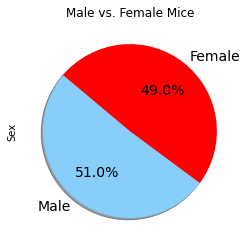

In [106]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

#Find the number of unique Sex in the dataset
gender=mouse_clean_results_df['Sex'].unique()
#Count the number of each Sex
gender=mouse_clean_results_df['Sex'].value_counts()
gender

#Create a pie plot using Pandas DataFrame.plot()
gender.plot(kind='pie', y='Sex', title="Male vs. Female Mice", startangle=140, autopct='%1.1f%%', shadow=True,\
fontsize=14, colors=["lightskyblue", "red"], legend=False)
plt.show()


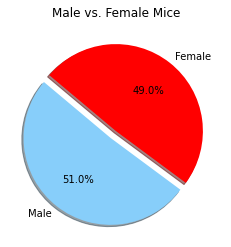

In [107]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#Find the number of unique Sex in the dataset
gender=mouse_clean_results_df['Sex'].unique()
#Count the number of each Sex
gender=mouse_clean_results_df['Sex'].value_counts()
gender

#Create a pie plot using Matplotlib's pyplot
colors = ["lightskyblue", "red"]
labels = ["Male", "Female"]
explode = (0.1, 0)

plt.pie(gender, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Male vs. Female Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [108]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
#Group by the Mouse ID and the maximum number of timepoints (days) for the Mouse ID
MaxTimeCap= mouse_clean_results_df.groupby(['Mouse ID']).agg({"Timepoint": ['max']})
#Drop the second line of the header
MaxTimeCap.columns = MaxTimeCap.columns.droplevel(1)
MaxTimeCap

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
# Combine the data into a single dataset
#The data set is merged on Timepoint (days) and Mouse ID
FinalCap = pd.merge(MaxTimeCap, mouse_clean_results_df, how="left", on=["Timepoint", "Mouse ID"])


# Display the data table
FinalCap

,Timepoint,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,45,a203,Infubinol,Female,20,23,67.973419,2
1,45,a251,Infubinol,Female,21,25,65.525743,1
2,45,a262,Placebo,Female,17,29,70.717621,4
3,45,a275,Ceftamin,Female,20,28,62.999356,3
4,30,a366,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,10,z435,Propriva,Female,12,26,48.710661,0
244,45,z578,Ramicane,Male,11,16,30.638696,0
245,45,z581,Infubinol,Female,24,25,62.754451,3
246,45,z795,Naftisol,Female,13,29,65.741070,3


In [109]:
# Put treatments into a list for for loop (and later for plot labels)

#Create a list of the 4 Drug Regimen
Drug_Regimen= ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
TumorVol=[]

#The for loop for the Tumor Volume for each Drug Regimen
for DR in Drug_Regimen: 

    TumorVol.append(FinalCap["Tumor Volume (mm3)"][(FinalCap["Drug Regimen"]== DR)])

TumorVol              


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
#list for lower quartile
lowerq=[0,0,0,0]
#list for upper quartile
upperq=[0,0,0,0] 
#list for IQR
iqr=[0,0,0,0]
#list for lower bound
lower_bound=[0,0,0,0]
#list for upper bount
upper_bound =[0,0,0,0]
#list for upper bound outliers
OutlierUp=[]
#list for lower bound outliers
OutlierLow=[]

#The for loop to calculate the quartile values, IQR and outliers
for i in range(4):
    quartiles = TumorVol[i].quantile([.25,.5,.75])
    lowerq[i] = quartiles[0.25]
    upperq[i] = quartiles[0.75]
    iqr[i] = upperq[i]-lowerq[i]
    lower_bound[i] = lowerq[i] - (1.5*iqr[i])
    upper_bound[i] = upperq[i] + (1.5*iqr[i])

    #Find the upper bound outliers
    OutlierUp.append(FinalCap["Tumor Volume (mm3)"][(FinalCap["Drug Regimen"]==Drug_Regimen[i])&
                                                     (FinalCap["Tumor Volume (mm3)"]>upper_bound[i])].values)
    
    #Find the lower bound outliers
    OutlierLow.append(FinalCap["Tumor Volume (mm3)"][(FinalCap["Drug Regimen"]==Drug_Regimen[i])&
                                                     (FinalCap["Tumor Volume (mm3)"]<lower_bound[i])].values)


#Print the Drug Regimen and it's IQR, Upper Bound value, Lower Bound value and Outliers using a for loop
for i in range(4):
    print(Drug_Regimen[i])
    print(f"IQR ={iqr[i]}")
    print(f"Lower Bound ={lower_bound[i]}")
    print(f"Upper Bound ={upper_bound[i]}")
    print(f"Outliers ={OutlierUp[i],OutlierLow[i]}")


Capomulin
IQR =7.781863460000004
Lower Bound =20.70456164999999
Upper Bound =51.83201549
Outliers =(array([], dtype=float64), array([], dtype=float64))
Ramicane
IQR =9.098536719999998
Lower Bound =17.912664470000003
Upper Bound =54.30681135
Outliers =(array([], dtype=float64), array([], dtype=float64))
Infubinol
IQR =11.477135160000003
Lower Bound =36.83290494999999
Upper Bound =82.74144559000001
Outliers =(array([], dtype=float64), array([36.3213458]))
Ceftamin
IQR =15.577752179999997
Lower Bound =25.355449580000002
Upper Bound =87.66645829999999
Outliers =(array([], dtype=float64), array([], dtype=float64))


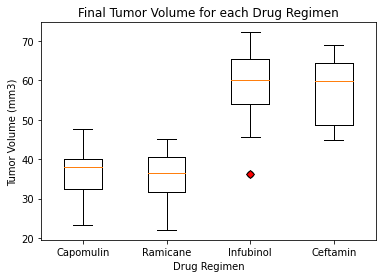

In [116]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#https://matplotlib.org/stable/gallery/pyplots/boxplot_demo_pyplot.html
red_diamond = dict(markerfacecolor='red', marker='D')
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume for each Drug Regimen')
ax1.set_xlabel('Drug Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(TumorVol)
ax1.boxplot(TumorVol, flierprops=red_diamond)
plt.xticks((1,2,3,4),["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.show()

## Line and Scatter Plots

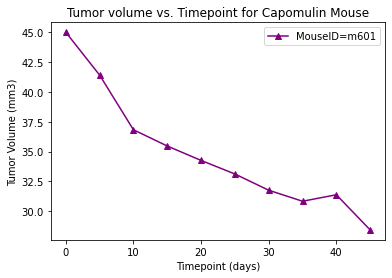

In [111]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#selected Mouse ID m601
#Retrieve the data for mouse ID m601
mouse_Cap_df = mouse_clean_results_df.loc[(mouse_clean_results_df["Mouse ID"] =="m601")]
mouse_Cap_df

#Create Line Plot
plt.plot(mouse_Cap_df["Timepoint"],mouse_Cap_df["Tumor Volume (mm3)"], marker="^", color='purple', label="MouseID=m601")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor volume vs. Timepoint for Capomulin Mouse")
plt.legend(loc="upper right")
plt.show()

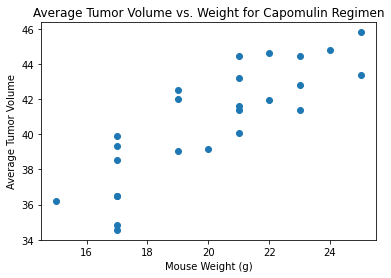

In [115]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

#Retrieve the data for Drug Regimen Capomulin
Cap_df = mouse_clean_results_df.loc[(mouse_clean_results_df["Drug Regimen"] =="Capomulin")]
Cap_df

#Grouup the data my Mouse ID based on average Tumor Volumen and max weight (only one weight/mouse)
values= Cap_df.groupby(['Mouse ID']).agg({"Tumor Volume (mm3)": ['mean'],"Weight (g)": ['max']})
#Drop the second row of the header
values.columns = values.columns.droplevel(1)
values

#Create Scatter Plot
x_values = values["Weight (g)"].values
y_values = values["Tumor Volume (mm3)"].values
plt.scatter(x_values,y_values)
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume")
plt.title("Average Tumor Volume vs. Weight for Capomulin Regimen")
plt.show()

## Correlation and Regression

The r-squared is: 0.7088568047708717


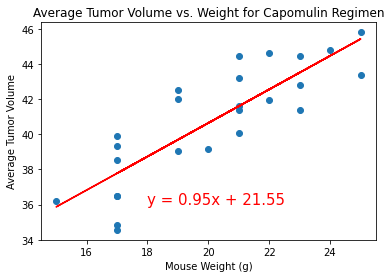

In [114]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(18,36),fontsize=15,color="red")
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume')
plt.title("Average Tumor Volume vs. Weight for Capomulin Regimen")
#Print the r-sqared value
print(f"The r-squared is: {rvalue**2}")
plt.show()